# ***Fashion MNIST Dataset***

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.4.1'

## ***Load Dataset***

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# index of labels in the list indicate label

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## ***Explore Dataset***

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
for i in y_train[:10]:
  print(class_names[i])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal


## ***Plot Image***

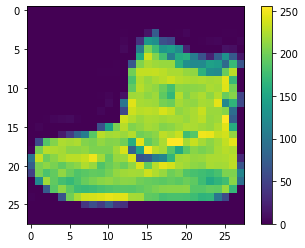

In [ ]:
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## ***Resize Image***

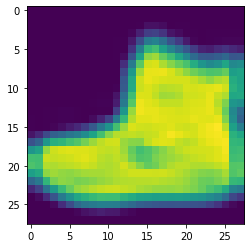

In [ ]:
plt.imshow(cv2.blur(x_train[0], ksize=(3,3)))

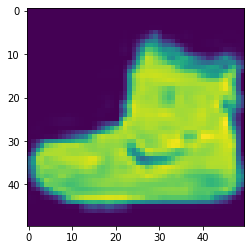

In [ ]:
import cv2

plt.imshow(cv2.resize(x_train[0], (50, 50)))
plt.show()

## ***PreProcess Images***

In [ ]:
x_train[0].max()

255

In [ ]:
x_test[0].max()

255

In [ ]:
# normalize values between 0 & 1

x_train = x_train/255
x_test = x_test/255

## another method to normalize

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
print(x_train[0].max())
print(x_test[1].max())

1.0
1.0


## ***Check Data***

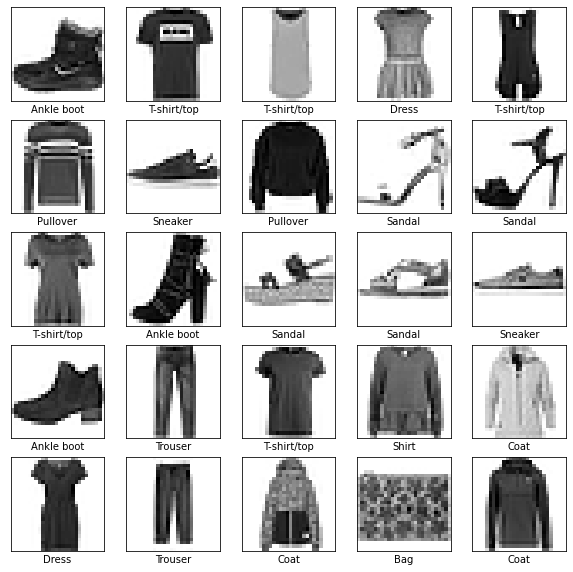

In [ ]:
# check if images and class align

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show()

## ***Create & Compile Model***

In [ ]:
model = tf.keras.models.Sequential(
[    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')]
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6509 - accuracy: 0.7737 - val_loss: 0.4057 - val_accuracy: 0.8558
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8612 - val_loss: 0.3685 - val_accuracy: 0.8691
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8718 - val_loss: 0.3556 - val_accuracy: 0.8717
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3073 - accuracy: 0.8877 - val_loss: 0.3488 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3004 - accuracy: 0.8909 - val_loss: 0.3295 - val_accuracy: 0.8821
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.8960 - val_loss: 0.3397 - val_accuracy: 0.8796
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2645 - accuracy: 0.9037 - val_loss: 0.3554 - val_accuracy:

## ***Dealing with OverFitting***

In [ ]:
# if accuracy >> val_accuracy then model is overfitting to training_data

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(10, activation='softmax')]
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7305 - accuracy: 0.7443 - val_loss: 0.4254 - val_accuracy: 0.8469
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4390 - accuracy: 0.8443 - val_loss: 0.3935 - val_accuracy: 0.8545
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3907 - accuracy: 0.8601 - val_loss: 0.3772 - val_accuracy: 0.8604
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3652 - accuracy: 0.8656 - val_loss: 0.3463 - val_accuracy: 0.8748
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3572 - accuracy: 0.8709 - val_loss: 0.3604 - val_accuracy: 0.8667
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3291 - accuracy: 0.8808 - val_loss: 0.3379 - val_accuracy: 0.8797
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3173 - accuracy: 0.8838 - val_loss: 0.3412 - val_accuracy:

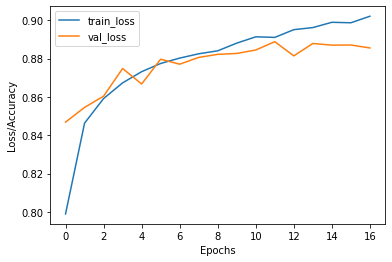

In [ ]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
metrics = ['loss', 'val_loss']

def plot_curve(epochs, hist):
  plt.plot(epochs, hist['accuracy'], label='train_accuracy')
  plt.plot(epochs, hist['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss/Accuracy')
  plt.legend()
  plt.show()

plot_curve(epochs, hist)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

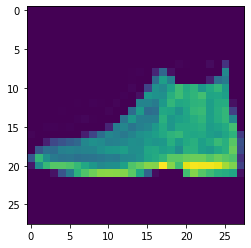

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

9

## ***Plot Full Class Predictions***

In [ ]:
def plot_image(i, prediction_array, test_labels, test_images):
  true_label, img = test_labels[i], test_images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array[i])
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% {}'.format(class_names[predicted_label], 100*np.max(prediction_array[i]), class_names[true_label]))

def plot_value_array(i, prediction_array, test_labels):
  true_label = test_labels[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks(range(10))
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

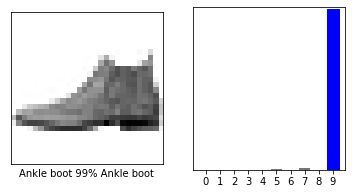

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

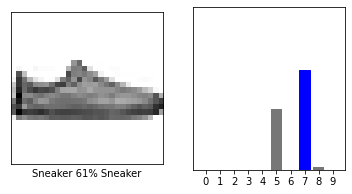

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

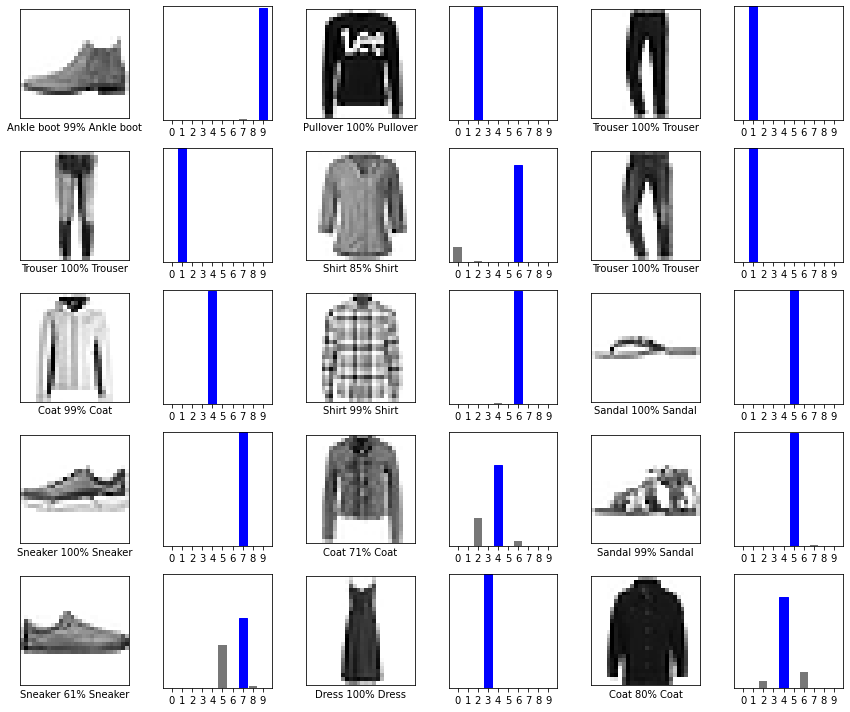

In [ ]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## ***Use Trained Model***

In [ ]:
img = x_test[9099]

img.shape

(28, 28)

In [ ]:
img = (np.expand_dims(img, 0))

# img = np.squeeze(img, axis=0)

In [ ]:
img.shape

(1, 28, 28)

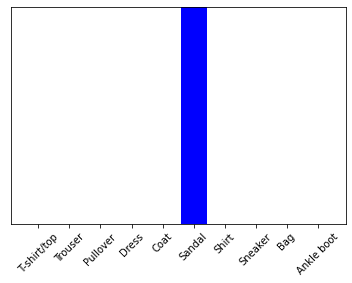

In [ ]:
prediction_single = model.predict(img)
prediction_single

plot_value_array(9099, prediction_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

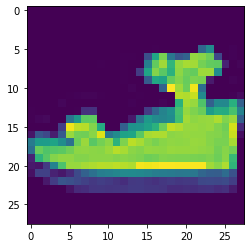

In [ ]:
plt.imshow(x_test[9099])